In [3]:
import pandas as pd

# 读取第一个Excel文件，包含单品编码和分类编码
df1 = pd.read_excel('附件1.xlsx')

# 读取第二个Excel文件，包含单品编码
df2 = pd.read_excel('附件2.xlsx')

# 删除销售类型为'退货'的数据
df2 = df2[df2['销售类型'] != '退货']

# 使用merge函数将两个数据框根据单品编码合并
merged_df = df2.merge(df1, on='单品编码', how='left')

# 保存更新后的文件
merged_df.to_excel('附件2-更新.xlsx', index=False)

In [4]:
df = pd.read_excel('附件13.xlsx')

# 将销售日期列转换为日期时间类型
df['日期'] = pd.to_datetime(df['日期'])

# 筛选出2023年4月-6月范围内的数据
start_date = '2023-04-01'
end_date = '2023-06-30'
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

# 保存筛选后的数据到新的Excel文件
new_excel_file = "4-6成本数据.xlsx"  # 新文件路径和名称
filtered_df.to_excel(new_excel_file, index=False)

print("已保存筛选后的数据到新文件:", new_excel_file)


已保存筛选后的数据到新文件: 4-6成本数据.xlsx


In [ ]:
import pandas as pd

# 读取4-6销售数据
sales_data = pd.read_excel("附件2-更新1.xlsx")  # 替换成4-6销售数据的文件路径

# 读取4-6成本数据
cost_data = pd.read_excel("附件13.xlsx")  # 替换成4-6成本数据的文件路径

# 创建一个空的列来存储批发价格
sales_data['批发价格(元/千克)'] = None

# 循环遍历4-6销售数据的每一行
for index, row in sales_data.iterrows():
    # 提取销售日期和单品名称
    sales_date = row['销售日期']
    product_name = row['单品名称']
    
    # 在4-6成本数据中查找匹配的行
    matching_row = cost_data[(cost_data['日期'] == sales_date) & (cost_data['单品名称'] == product_name)]
    
    # 如果找到匹配的行，将批发价格赋给销售数据
    if not matching_row.empty:
        wholesale_price = matching_row.iloc[0]['批发价格(元/千克)']
        sales_data.at[index, '批发价格(元/千克)'] = wholesale_price

print(sales_data)

In [6]:
# 将结果保存到新的Excel文件
sales_data.to_excel("4-6销售数据_with_成本.xlsx", index='销售日期')  # 新文件路径和名称

In [63]:
import pandas as pd

# 读取4-6销售数据
sales_data = pd.read_excel("624-630数据.xlsx")  # 替换成4-6销售数据的文件路径

# 读取4-6成本数据
cost_data = pd.read_excel("附件13.xlsx")  # 替换成4-6成本数据的文件路径

# 创建一个空的列来存储批发价格
sales_data['批发价格(元/千克)'] = None

# 循环遍历4-6销售数据的每一行
for index, row in sales_data.iterrows():
    # 提取销售日期和单品名称
    sales_date = row['销售日期']
    product_name = row['单品名称']
    
    # 在4-6成本数据中查找匹配的行
    matching_row = cost_data[(cost_data['日期'] == sales_date) & (cost_data['单品名称'] == product_name)]
    
    # 如果找到匹配的行，将批发价格赋给销售数据
    if not matching_row.empty:
        wholesale_price = matching_row.iloc[0]['批发价格(元/千克)']
        sales_data.at[index, '批发价格(元/千克)'] = wholesale_price

print(sales_data)

           销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型  \
0    2023-06-24  09:10:47.276  102900011032022   1.000         2.8   销售   
1    2023-06-24  09:10:47.531  102900005115786   0.379         4.0   销售   
2    2023-06-24  09:13:51.795  102900005115762   0.505         4.0   销售   
3    2023-06-24   09:14:43.77  102900005115762   0.505         4.0   销售   
4    2023-06-24  09:14:44.044  102900011030059   1.000         4.5   销售   
...         ...           ...              ...     ...         ...  ...   
3488 2023-06-30  21:35:13.264  102900005115250   0.284        24.0   销售   
3489 2023-06-30  21:35:14.358  102900011022764   0.669        12.0   销售   
3490 2023-06-30  21:35:20.264  102900005115250   0.125        24.0   销售   
3491 2023-06-30  21:35:21.509  102900011016701   0.252         5.2   销售   
3492 2023-06-30  21:40:48.248  102900011022764   0.803        12.0   销售   

     是否打折销售     单品名称        分类编码 分类名称 批发价格(元/千克)  
0         否   小皱皮(份)  1011010504  辣椒类       1.51

In [64]:
# 将结果保存到新的Excel文件
sales_data.to_excel("624-630销售数据_with_成本.xlsx", index='销售日期')  # 新文件路径和名称

In [8]:
import pandas as pd

# 读取Excel文件
excel_file = "4-6销售数据_with_成本.xlsx"  
df = pd.read_excel(excel_file)

# 计算加权平均成本加成率
df['加权平均成本加成率'] = df['销量(千克)'] * df['成本加成率']

# 计算每个分类的总销量
df['总销量'] = df.groupby(['销售日期', '分类名称'])['销量(千克)'].transform('sum')

# 计算加权平均成本加成率
df['加权平均成本加成率'] = df['加权平均成本加成率'] / df['总销量']

# 删除多余的列
df.drop(columns=['销量(千克)', '总销量'], inplace=True)

# 计算每一天每个分类名称的成本加成率
result = df.groupby(['销售日期', '分类名称'])['加权平均成本加成率'].sum().reset_index()

# 打印结果
print(result)


          销售日期   分类名称  加权平均成本加成率
0   2023-04-01  水生根茎类   0.701084
1   2023-04-01    花叶类   0.529244
2   2023-04-01    花菜类   0.404832
3   2023-04-01     茄类   0.562238
4   2023-04-01    辣椒类   0.422511
..         ...    ...        ...
541 2023-06-30    花叶类   0.639348
542 2023-06-30    花菜类   0.456792
543 2023-06-30     茄类   0.729765
544 2023-06-30    辣椒类   0.830469
545 2023-06-30    食用菌   0.359703

[546 rows x 3 columns]


In [9]:
# 使用透视表将分类名称作为列，季度作为行，销量作为值
pivot_table = result.pivot_table(index='销售日期', columns='分类名称', values='加权平均成本加成率', aggfunc='sum')

# 打印结果
print(pivot_table)


分类名称           水生根茎类       花叶类       花菜类        茄类       辣椒类       食用菌
销售日期                                                                  
2023-04-01  0.701084  0.529244  0.404832  0.562238  0.422511  0.515397
2023-04-02  0.689269  0.539416  0.321689  0.549060  0.468858  0.484291
2023-04-03  0.658745  0.770889  0.359512  0.584939  0.439160  0.450390
2023-04-04  0.692548  0.825128  0.282763  0.611333  0.418321  0.471383
2023-04-05  0.737439  0.876051  0.173360  0.576056  0.418291  0.479112
...              ...       ...       ...       ...       ...       ...
2023-06-26  0.380044  0.566095  0.763224  0.567975  0.984999  0.477965
2023-06-27  0.206117  0.510447  0.538462  0.654855  1.026371  0.317328
2023-06-28  0.184276  0.402597  0.577152  0.588295  0.948153  0.446482
2023-06-29  0.391684  0.457868  0.486720  0.632503  0.899816  0.406713
2023-06-30  0.246479  0.639348  0.456792  0.729765  0.830469  0.359703

[91 rows x 6 columns]


In [10]:
pivot_table.to_excel('品类成本加成率.xlsx', index='销售日期')

In [13]:
df=pd.read_excel('品类日销售额.xlsx')
# 使用透视表将分类名称作为列，季度作为行，销量作为值
pivot_table = df.pivot_table(index='销售日期', columns='分类名称', values='销量(千克)', aggfunc='sum')

# 打印结果
print(pivot_table)

pivot_table.to_excel("4-6品类日销售额.xlsx", index='销售日期') 

分类名称         水生根茎类      花叶类     花菜类      茄类     辣椒类     食用菌
销售日期                                                       
2020-07-01   4.850  205.402  46.640  35.374  76.715  35.365
2020-07-02   4.600  198.362  43.943  32.199  66.064  48.510
2020-07-03   9.572  190.779  42.076  35.896  64.253  42.442
2020-07-04   5.439  236.587  55.662  57.067  81.282  47.262
2020-07-05   4.019  223.899  55.474  61.816  98.496  73.213
...            ...      ...     ...     ...     ...     ...
2023-06-26  10.384   80.524   8.083  21.224  72.185  39.582
2023-06-27  16.454  127.278  14.272   8.415  67.120  38.708
2023-06-28  14.946  130.182  16.069  15.651  68.534  53.742
2023-06-29  22.945  135.090  24.367  11.511  89.113  48.314
2023-06-30  19.419  130.464  28.087  24.530  82.286  39.572

[1085 rows x 6 columns]


In [14]:
df = pd.read_excel('4-6品类日销售额.xlsx')

# 将销售日期列转换为日期时间类型
df['销售日期'] = pd.to_datetime(df['销售日期'])

# 筛选出2023年4月-6月范围内的数据
start_date = '2023-04-01'
end_date = '2023-06-30'
filtered_df = df[(df['销售日期'] >= start_date) & (df['销售日期'] <= end_date)]

# 保存筛选后的数据到新的Excel文件
new_excel_file = "4-6品类日销售额-.xlsx"  # 新文件路径和名称
filtered_df.to_excel(new_excel_file, index=False)

In [2]:
# 读取Excel文件
df = pd.read_excel('附件2-更新.xlsx')

# 将销售日期转换为日期时间格式
df['销售日期'] = pd.to_datetime(df['销售日期'])

# 根据月份将数据分为四个季度
df['季度'] = pd.cut(df['销售日期'].dt.month,
                    bins=[3, 6, 9, 12, 13],
                    labels=['Q1', 'Q2', 'Q3', 'Q4'],
                    right=False)

# 根据分类名称和季度对销量进行加总
result = df.groupby(['分类名称', '季度'])['销量(千克)'].sum().reset_index()

# 使用透视表将分类名称作为列，季度作为行，销量作为值
pivot_table = result.pivot_table(index='季度', columns='分类名称', values='销量(千克)', aggfunc='sum')

# 打印结果
print(pivot_table)


分类名称      水生根茎类        花叶类        花菜类        茄类        辣椒类        食用菌
季度                                                                   
Q1     4794.959  41546.116   7815.231  5862.958  22913.315  14466.955
Q2     8445.686  55171.796  11890.340  8204.905  21963.592  13720.533
Q3    12291.234  52868.353  11375.210  3854.517  20847.274  21753.309
Q4     4898.500  16517.314   3145.322   860.461   5981.396   8730.816


In [3]:
# 将结果存储为Excel文件
pivot_table.to_excel('销量汇总.xlsx', sheet_name='销量汇总')

In [9]:
# 定义一个函数，将日期映射到季度名称
def map_to_season(date):
    year = date.year
    month = date.month
    if month >= 3 and month <= 5:
        return f'{year}年春'
    elif month >= 6 and month <= 8:
        return f'{year}年夏'
    elif month >= 9 and month <= 11:
        return f'{year}年秋'
    elif month >=1 and month <=2:
        return f'{year-1}年冬'
    else:
        return f'{year}年冬'

# 创建一个新的列，存储季度名称
df['季度'] = df['销售日期'].apply(map_to_season)

# 根据分类名称和季度对销量进行加总
result = df.groupby(['分类名称', '季度'])['销量(千克)'].sum().reset_index()

# 使用透视表将分类名称作为列，季度作为行，销量作为值
pivot_table = result.pivot_table(index='季度', columns='分类名称', values='销量(千克)', aggfunc='sum')

# 将结果存储为Excel文件
pivot_table.to_excel('各年季度销量汇总.xlsx', sheet_name='季度销量汇总')


In [10]:
print(pivot_table)

分类名称       水生根茎类        花叶类       花菜类        茄类        辣椒类        食用菌
季度                                                                   
2020年冬  5780.636  19054.313  3998.963  1787.780   7171.142  10211.107
2020年夏  1199.236  13838.595  3271.213  2504.944   5020.393   3254.360
2020年秋  3103.744  18582.783  4924.420  1876.048   5739.062   7924.441
2021年冬  4320.119  10313.816  3024.527  1481.974   6533.824   5608.222
2021年夏  1988.206  17313.847  3394.359  2757.218   5578.814   3804.879
2021年春  1737.464  15440.707  3655.046  1959.022   6827.411   4791.162
2021年秋  4160.169  10814.907  2112.931  1462.288   3901.446   4520.649
2022年冬  4948.719  19566.584  3662.180  1239.648  12159.482  10326.599
2022年夏  4747.457  19359.157  4691.579  2173.428   8649.452   4942.309
2022年春  1321.482  10263.164  1719.437  2112.336   6108.737   2369.413
2022年秋  5027.321  23470.663  4337.859   516.181  11206.766   9308.219
2023年夏   510.787   4660.197   533.189   769.315   2714.933   1718.985
2023年春  1736.013  15

In [12]:
# 提取销售日期中的年份和月份
df['年份'] = df['销售日期'].dt.year
df['月份'] = df['销售日期'].dt.month

# 根据单品名称、年份和月份对销量进行加总
result = df.groupby(['单品名称', '年份', '月份'])['销量(千克)'].sum().reset_index()

# 创建时间序列数据
time_series_data = result.pivot_table(index=['年份', '月份'], columns='单品名称', values='销量(千克)', fill_value=0)


In [13]:
print(time_series_data)

单品名称     七彩椒(1)  七彩椒(2)  七彩椒(份)      上海青  上海青(份)   东门口小白菜    丝瓜尖    云南油麦菜  \
年份   月份                                                                     
2020 7   32.928   0.000       0  452.999       0   55.090  0.000  935.567   
     8   14.843   0.000       0  702.708       0   50.767  0.000  745.185   
     9   14.841   0.000       0  529.028       0   47.205  0.000  319.056   
     10  14.177   0.000       0  256.740       0   52.200  0.000  337.648   
     11  13.523   0.000       0  152.065       0   24.107  0.000  330.112   
     12  29.177   0.000       0  152.823       0   31.250  0.000  420.726   
2021 1   29.480   0.000       0  255.919       0   62.923  0.000  473.764   
     2   11.448   0.000       0  408.955       0   44.480  4.231  752.867   
     3    1.533   0.000       0  393.509       0   55.459  0.000  706.430   
     4    0.490   0.000       0  403.399       0  120.176  0.000  333.600   
     5    1.449   0.000       0  236.796       0  121.544  0.000  393.741   

In [14]:
time_series_data.to_excel('单品销量时间序列.xlsx', sheet_name='单品销量时间序列')

In [16]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel('花菜类.xlsx')

# 将销售日期转换为日期时间格式
df['销售日期'] = pd.to_datetime(df['销售日期'])

# 提取销售日期中的年份和月份
df['年份'] = df['销售日期'].dt.year
df['月份'] = df['销售日期'].dt.month

# 根据单品名称和年份、月份对销量进行加总
monthly_sales = df.groupby(['单品名称', '年份', '月份'])['销量(千克)'].sum().reset_index()

# 创建单品每月销量的时间序列数据
monthly_time_series = monthly_sales.pivot_table(index=['年份', '月份'], columns='单品名称', values='销量(千克)', aggfunc='sum')

# 创建总销量的时间序列数据
total_sales = df.groupby(['年份', '月份'])['销量(千克)'].sum().reset_index()
total_time_series = total_sales.pivot_table(index=['年份', '月份'], values='销量(千克)', aggfunc='sum')

# 打印单品每月销量的时间序列数据
print("单品每月销量的时间序列数据:")
print(monthly_time_series)

# 打印总销量的时间序列数据
print("\n总销量的时间序列数据:")
print(total_time_series)


单品每月销量的时间序列数据:
单品名称      枝江青梗散花  紫白菜(1)  紫白菜(2)       西兰花     青梗散花
年份   月份                                            
2020 7       NaN     NaN     NaN   832.019  691.561
     8       NaN     NaN     NaN   900.215  848.443
     9       NaN     NaN     NaN   802.842  533.224
     10      NaN     NaN     NaN   928.648  716.315
     11      NaN     NaN     NaN  1309.960  633.856
     12      NaN     NaN     NaN   682.089  553.833
2021 1       NaN   9.725     NaN   658.916  593.806
     2       NaN   1.461     NaN   850.322  649.428
     3       NaN     NaN     NaN   550.907  615.355
     4       NaN     NaN     NaN   743.482  636.916
     5       NaN     NaN     NaN   681.547  426.839
     6       NaN     NaN     NaN   747.808  476.764
     7       NaN     NaN     NaN   915.093  532.541
     8       NaN     NaN     NaN   468.936  253.868
     9       NaN     NaN     NaN   776.187    3.297
     10      NaN   0.798     NaN   736.666    6.496
     11      NaN     NaN     NaN   600.229    0.7

In [17]:
# 合并单品每月销量和总销量的时间序列数据
merged_time_series = pd.concat([monthly_time_series, total_time_series], axis=1)

# 将结果存储为Excel文件
merged_time_series.to_excel('花菜类时间序列数据.xlsx', sheet_name='花菜类')


In [37]:
# 读取Excel文件
df = pd.read_excel('单品销量时间序列.xlsx')

# 提取蔬菜销售额数据，假设蔬菜销售额列从第三列开始
vegetable_sales = df.iloc[:, 2:]

# 计算每列的销售额总和
column_sums = vegetable_sales.sum()

# 计算每列的零项数量
zero_counts = (vegetable_sales == 0).sum()

# 创建一个DataFrame，包含列名、销售额总和和零项数量
summary_df = pd.DataFrame({'列名': vegetable_sales.columns, '销售额总和': column_sums, '零项数量': zero_counts})

# 按销售额总和升序排序，零项数量升序排序
sorted_df = summary_df.sort_values(by=['销售额总和', '零项数量'], ascending=[False, True])

# 选择前10列数据
top_10_columns = sorted_df.head(10)

# 打印或保存结果
print(top_10_columns)

top_10_columns.to_excel('销量排名前十单品.xlsx')

              列名      销售额总和  零项数量
芜湖青椒(1)  芜湖青椒(1)  28164.331     6
西兰花          西兰花  27537.228     0
净藕(1)      净藕(1)  27149.440     0
大白菜          大白菜  19187.218    14
云南生菜        云南生菜  15910.461     1
金针菇(盒)    金针菇(盒)  15596.000    20
云南生菜(份)  云南生菜(份)  14325.000    18
紫茄子(2)    紫茄子(2)  13602.001     0
西峡香菇(1)  西峡香菇(1)  11920.227     3
小米椒(份)    小米椒(份)  10833.000    18


/var/folders/39/8y7y5x9n72d941ckf_fgdyw80000gn/T/ipykernel_70045/2789350910.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.replace(0, np.nan, inplace=True)
/var/folders/39/8y7y5x9n72d941ckf_fgdyw80000gn/T/ipykernel_70045/2789350910.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.fillna(selected_data.ffill() + selected_data.bfill() / 2, inplace=True)


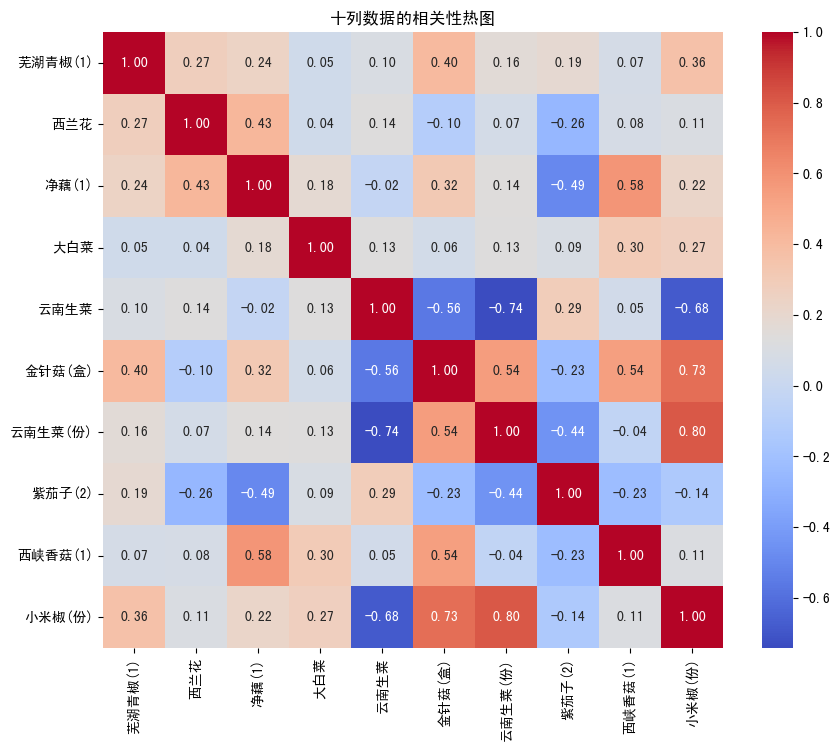

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 选择需要分析的十列数据
selected_columns = [
    '芜湖青椒(1)',
    '西兰花',
    '净藕(1)',
    '大白菜',
    '云南生菜',
    '金针菇(盒)',
    '云南生菜(份)',
    '紫茄子(2)',
    '西峡香菇(1)',
    '小米椒(份)'
]

selected_data = df[selected_columns]

# 将零值替换为NaN（缺失值）
selected_data.replace(0, np.nan, inplace=True)

# 使用上下均值法填充缺失值
selected_data.fillna(selected_data.ffill() + selected_data.bfill() / 2, inplace=True)

# 计算相关性矩阵
correlation_matrix = selected_data.corr()

# 可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('十列数据的相关性热图')
plt.show()


In [21]:
# 导出相关性矩阵到Excel文件
correlation_matrix.to_excel('相关性矩阵.xlsx', sheet_name='相关性矩阵')

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.optimize import minimize
    
 # 读取销售数据和批发价格数据
sales_data = pd.read_excel('附件2-更新.xlsx')  # 假设销售数据存储在名为'附件二.xlsx'的Excel文件中
wholesale_prices = pd.read_excel('附件3.xlsx')  # 批发价格数据存储在名为'附件三.xlsx'的Excel文件中
 

In [25]:
# 使用groupby按分类名称和销售日期分组，并计算销量的总和
result = sales_data.groupby(['分类名称', '销售日期'])['销量(千克)'].sum().reset_index()

# 打印结果
print(result)

AttributeError: module 'pandas' has no attribute 'groupby'

In [28]:
result.to_excel('品类日销售额.xlsx',sheet_name='日销售额')

In [4]:
import pandas as pd

# 读取Excel文件
excel_file = "附件2-更新.xlsx"  # 替换成你的Excel文件路径
df = pd.read_excel(excel_file)

# 将销售日期转换为日期时间类型
df['销售日期'] = pd.to_datetime(df['销售日期'])

# 提取销售日期的月份作为新的列
df['销售月份'] = df['销售日期'].dt.strftime('%Y-%m')

# 使用groupby按分类名称和销售月份分组，并计算销量的总和
result = df.groupby(['分类名称', '销售月份'])['销量(千克)'].sum().reset_index()

# 打印结果
print(result)

      分类名称     销售月份    销量(千克)
0    水生根茎类  2020-07   332.256
1    水生根茎类  2020-08   867.180
2    水生根茎类  2020-09   798.931
3    水生根茎类  2020-10  1344.118
4    水生根茎类  2020-11   961.823
..     ...      ...       ...
211    食用菌  2023-02  2608.948
212    食用菌  2023-03  2700.630
213    食用菌  2023-04  2482.043
214    食用菌  2023-05  2128.108
215    食用菌  2023-06  1718.985

[216 rows x 3 columns]


In [5]:
# 导出数据到Excel文件
result.to_excel("品类月销售额.xlsx", index=False)  # 将结果保存为新的Excel文件

In [6]:
# 使用pivot方法重新排列数据，将分类名称作为列，销售月份作为行，销售量(千克)作为值
pivot_data = result.pivot(index="销售月份", columns="分类名称", values="销量(千克)")

# 如果需要，可以重命名列名称
pivot_data.columns.name = None

# 打印结果
print(pivot_data)

            水生根茎类        花叶类       花菜类        茄类       辣椒类       食用菌
销售月份                                                                
2020-07   332.256   6600.710  1523.580  1365.551  2201.190  1619.071
2020-08   867.180   7261.517  1748.658  1139.393  2822.514  1636.524
2020-09   798.931   5671.452  1336.066   671.692  1992.413  1643.206
2020-10  1344.118   6397.141  1644.963   771.967  1909.822  3001.871
2020-11   961.823   6519.819  1943.816   433.272  1838.135  3282.463
2020-12  1898.646   6901.719  1235.922   408.995  1428.131  3478.297
2021-01  1922.910   6412.193  1262.447   501.591  1920.030  3043.698
2021-02  1961.572   5749.259  1501.211   877.194  3824.593  3693.482
2021-03   904.500   5067.150  1166.262   615.974  2576.283  2246.831
2021-04   524.278   4916.345  1380.398   619.437  1957.177  1379.944
2021-05   309.117   5465.001  1108.386   723.611  2296.274  1164.387
2021-06   328.498   4633.011  1224.572   821.743  1936.795  1122.852
2021-07   543.799   5568.509  1447

In [8]:
# 导出数据到Excel文件
pivot_data.to_excel("品类月销售额.xlsx", index='销售月份')  # 将结果保存为新的Excel文件


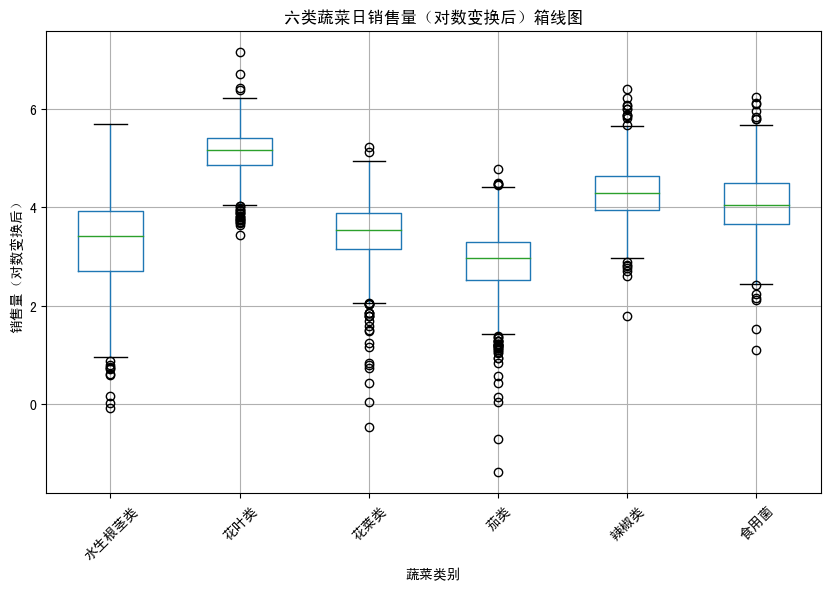

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 从Excel文件中加载数据
file_path = '品类日销售额1.xlsx'
df = pd.read_excel(file_path)

# 列名
columns = ['水生根茎类', '花叶类', '花菜类', '茄类', '辣椒类', '食用菌']

# 选择六类蔬菜的销售量数据
vegetable_sales_data = df[columns]

# 对数据进行对数变换
vegetable_sales_data_log = np.log(vegetable_sales_data)

# 绘制箱线图
plt.figure(figsize=(10, 6))
vegetable_sales_data_log.boxplot()
plt.title('六类蔬菜日销售量（对数变换后）箱线图')
plt.xlabel('蔬菜类别')
plt.ylabel('销售量（对数变换后）')
plt.xticks(rotation=45)  # 如果需要旋转x轴标签
plt.show()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61809D+00    |proj g|=  6.26693D-02

At iterate    5    f=  4.55690D+00    |proj g|=  3.19720D-02

At iterate   10    f=  4.50557D+00    |proj g|=  5.53898D-02

At iterate   15    f=  4.48070D+00    |proj g|=  4.17208D-02

At iterate   20    f=  4.47702D+00    |proj g|=  1.07858D-02

At iterate   25    f=  4.46813D+00    |proj g|=  1.85938D-02

At iterate   30    f=  4.46775D+00    |proj g|=  9.35110D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61415D+00    |proj g|=  3.58155D-02

At iterate    5    f=  5.57845D+00    |proj g|=  9.61800D-03

At iterate   10    f=  5.56524D+00    |proj g|=  3.79552D-02

At iterate   15    f=  5.53215D+00    |proj g|=  3.58055D-03

At iterate   20    f=  5.51052D+00    |proj g|=  1.76317D-02

At iterate   25    f=  5.50983D+00    |proj g|=  3.64363D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     35      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29106D+00    |proj g|=  5.93190D-02

At iterate    5    f=  4.22619D+00    |proj g|=  3.47212D-02

At iterate   10    f=  4.17349D+00    |proj g|=  2.42871D-02

At iterate   15    f=  4.17278D+00    |proj g|=  8.12454D-04

At iterate   20    f=  4.17277D+00    |proj g|=  2.56692D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     27      1     0     0   2.567D-06   4.173D+00
  F =   4.1727718424750604     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68903D+00    |proj g|=  5.59944D-02

At iterate    5    f=  3.59474D+00    |proj g|=  2.73354D-02

At iterate   10    f=  3.58242D+00    |proj g|=  3.84021D-02

At iterate   15    f=  3.57537D+00    |proj g|=  4.26953D-03

At iterate   20    f=  3.57529D+00    |proj g|=  1.03486D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   6.026D-06   3.575D+00
  F =   3.5752943719569221     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  5.03113D+00    |proj g|=  1.40240D-01

At iterate   15    f=  5.00882D+00    |proj g|=  2.10596D-03

At iterate   20    f=  5.00249D+00    |proj g|=  9.13607D-02

At iterate   25    f=  4.99424D+00    |proj g|=  1.47054D-02

At iterate   30    f=  4.99373D+00    |proj g|=  2.31156D-04

At iterate   35    f=  4.97707D+00    |proj g|=  1.36993D-02

At iterate   40    f=  4.97696D+00    |proj g|=  1.87726D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     61      1     0     0   1.877D-05   4.977D+00
  F =   4.9769555920876716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04051D+00    |proj g|=  4.87482D-02

At iterate    5    f=  4.97842D+00    |proj g|=  9.99734D-03

At iterate   10    f=  4.91842D+00    |proj g|=  2.55494D-02

At iterate   15    f=  4.90747D+00    |proj g|=  9.95626D-03

At iterate   20    f=  4.90109D+00    |proj g|=  5.28092D-03

At iterate   25    f=  4.90098D+00    |proj g|=  4.63712D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   

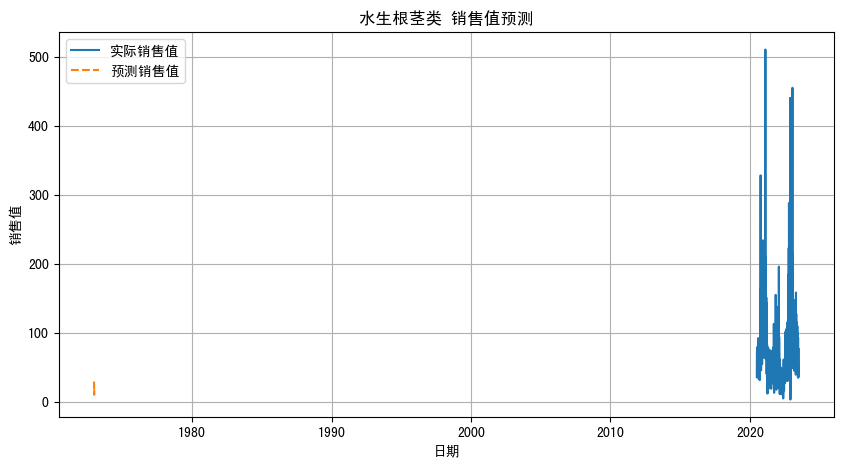

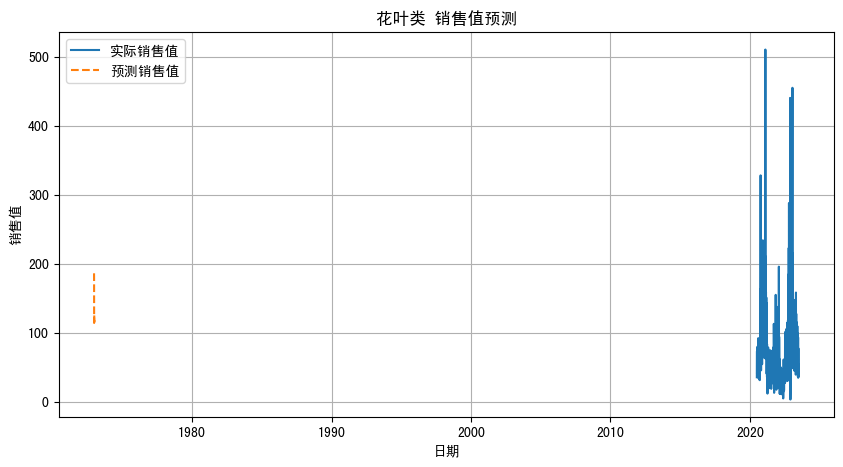

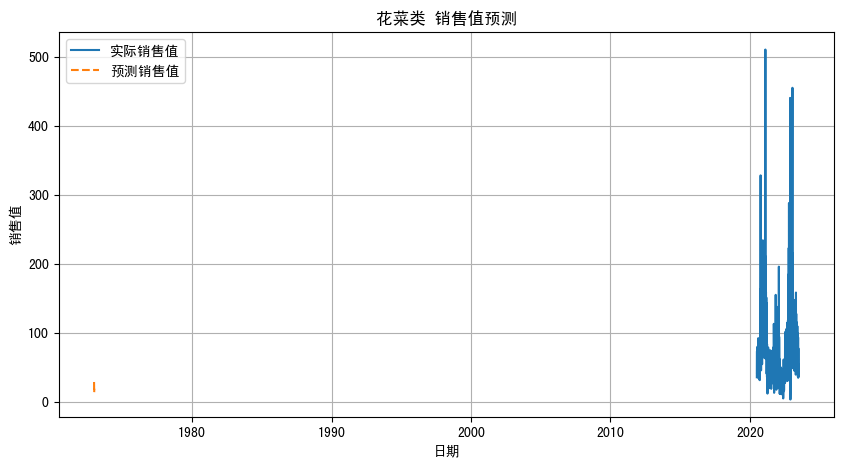

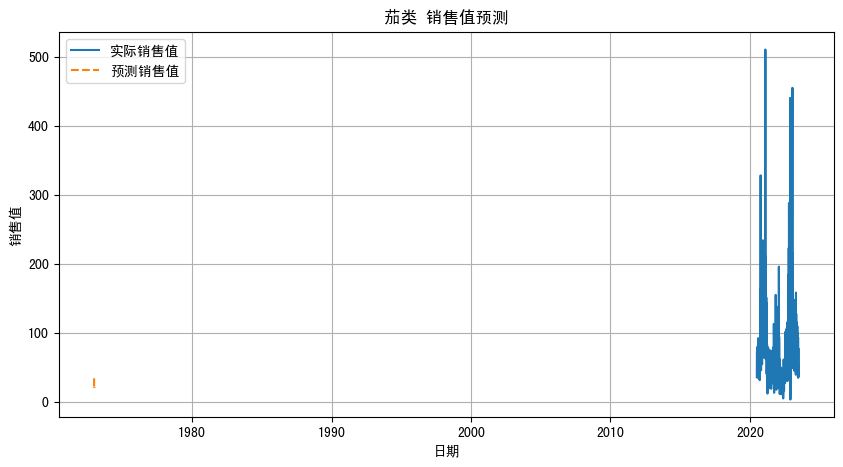

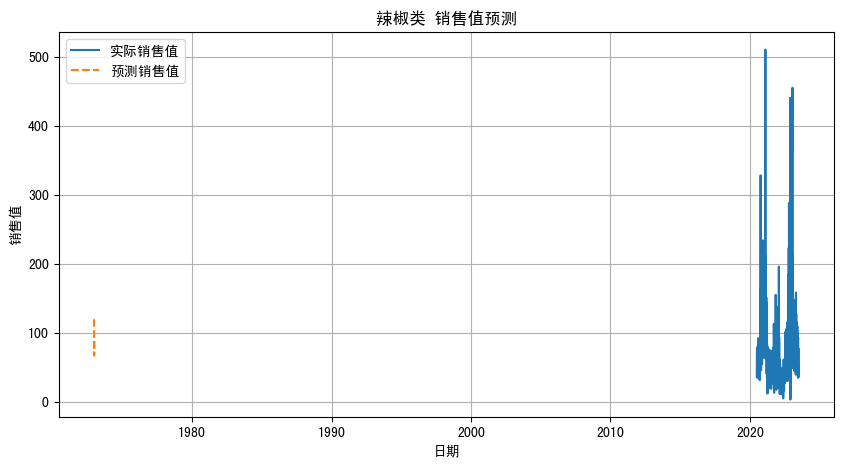

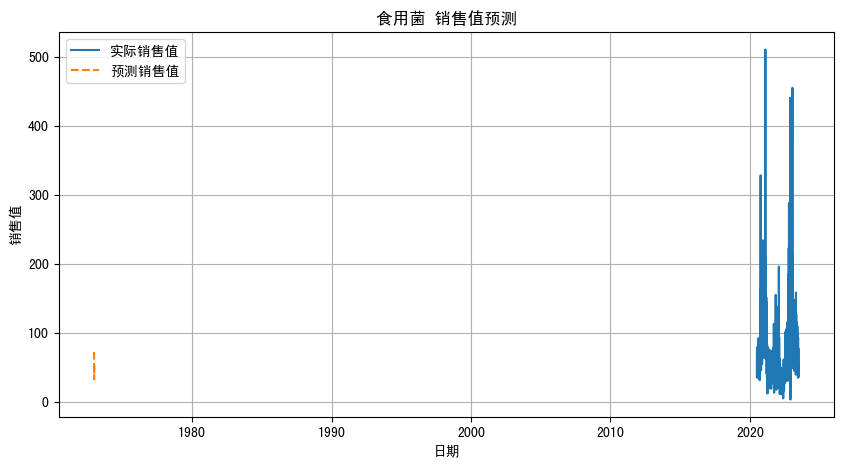

In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 从Excel文件中加载数据
file_path = '品类日销售额1.xlsx'
df = pd.read_excel(file_path)

# 设置日期列为索引
df['销售日期'] = pd.to_datetime(df['销售日期'])
df.set_index('销售日期', inplace=True)

# 列名
columns = ['水生根茎类', '花叶类', '花菜类', '茄类', '辣椒类', '食用菌']

# 针对每一列数据建立季节性ARIMA模型并预测未来7天的销售值
forecast_results = {}

for column in columns:
    # 获取列数据
    sales_data = df[column]
    
    # 建立季节性ARIMA模型（这里的季节性周期假设为7天）
    model = SARIMAX(sales_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    
    # 拟合模型
    results = model.fit()
    
    # 预测未来7天的销售值
    forecast = results.get_forecast(steps=7)
    forecast_mean = forecast.predicted_mean
    
    # 存储预测结果
    forecast_results[column] = forecast_mean

# 打印未来7天的销售值
for column in columns:
    print(f"{column} 未来7天的销售值预测：")
    print(forecast_results[column])
    print()

# 可视化销售值预测结果
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(sales_data.index, sales_data, label='实际销售值')
    plt.plot(forecast_results[column].index, forecast_results[column], label='预测销售值', linestyle='--')
    plt.title(f"{column} 销售值预测")
    plt.xlabel("日期")
    plt.ylabel("销售值")
    plt.legend()
    plt.grid(True)
    plt.show()


In [58]:
# 创建一个新的DataFrame来存储预测结果
forecast_df = pd.DataFrame(forecast_results)

# 将预测结果保存到新的Excel文件
forecast_excel_file = '预测销售值.xlsx'
forecast_df.to_excel(forecast_excel_file)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

fd=pd.read_excel('品类日销售额.xlsx')

# 选择特定品类（例如'茄类'）的数据
category_name = '茄类'
category_data = df[df['分类名称'] == category_name]

# 提取销售日期和销量(千克)
sales_data = category_data[['销售日期', '销量(千克)']]

# 将销售日期设置为索引并排序
sales_data.set_index('销售日期', inplace=True)
sales_data.sort_index(inplace=True)

# 将销售量数据归一化到[0, 1]范围内
scaler = MinMaxScaler()
sales_data['销量(千克)'] = scaler.fit_transform(sales_data[['销量(千克)']])

# 将时间序列数据转换成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols = []
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    df_supervised = pd.concat(cols, axis=1)
    if dropnan:
        df_supervised.dropna(inplace=True)
    return df_supervised

# 设定时间步和预测步数
n_steps_in = 7  # 输入的时间步数
n_steps_out = 7  # 预测的时间步数

# 转换数据为监督学习问题
reframed = series_to_supervised(sales_data, n_in=n_steps_in, n_out=n_steps_out)

# 划分数据为训练集和测试集
values = reframed.values
n_train_days = len(sales_data) - n_steps_out
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# 划分特征和标签
n_features = 1  # 只有销量(千克)作为特征
n_obs = n_steps_in * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_steps_out:]
test_X, test_y = test[:, :n_obs], test[:, -n_steps_out:]

# 将输入数据重塑为3D形状 [样本数, 时间步, 特征数]
train_X = train_X.reshape((train_X.shape[0], n_steps_in, n_features))
test_X = test_X.reshape((test_X.shape[0], n_steps_in, n_features))

# 构建LSTM神经网络模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(tf.keras.layers.Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# 训练模型
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# 使用模型进行预测
test_predict = model.predict(test_X)

# 将预测结果逆转为原始范围
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform(test_y)

# 计算均方根误差（RMSE）来评估模型性能
rmse = np.sqrt(mean_squared_error(test_y, test_predict))
print(f"均方根误差（RMSE）: {rmse}")

# 生成未来一周的日期
last_date = sales_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_steps_out + 1, closed='right')[1:]

# 创建DataFrame来存储预测结果
forecast_df = pd.DataFrame({'日期': forecast_dates, '销量(千克) 预测': test_predict.reshape(-1)})

# 打印预测结果表格
print("销量预测结果：")
print(forecast_df)


品类: 水生根茎类
回归系数 (斜率): -0.6272205578787922
截距: 16.501737095734203
R平方值 (拟合优度): 0.00


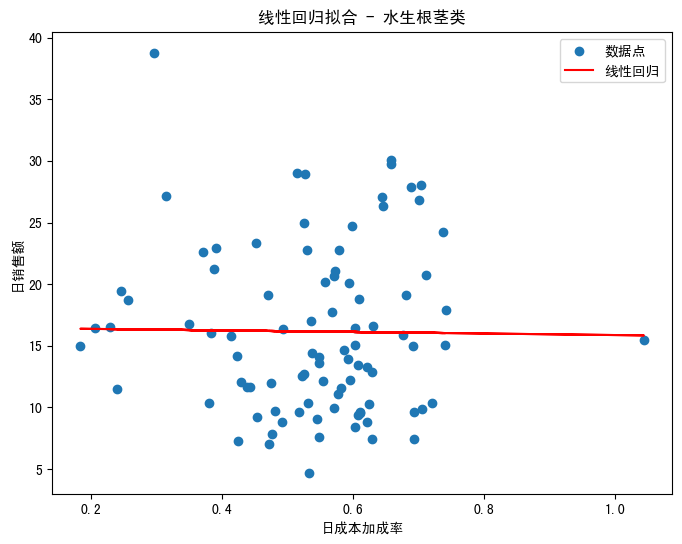

品类: 花叶类
回归系数 (斜率): 1.8920246359554709
截距: 164.14243879484027
R平方值 (拟合优度): 0.00


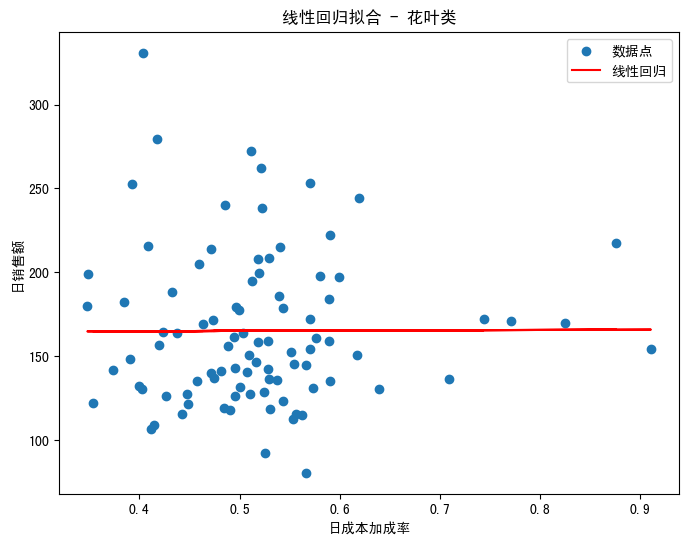

品类: 花菜类
回归系数 (斜率): -8.668255573922169
截距: 26.692735246894756
R平方值 (拟合优度): 0.01


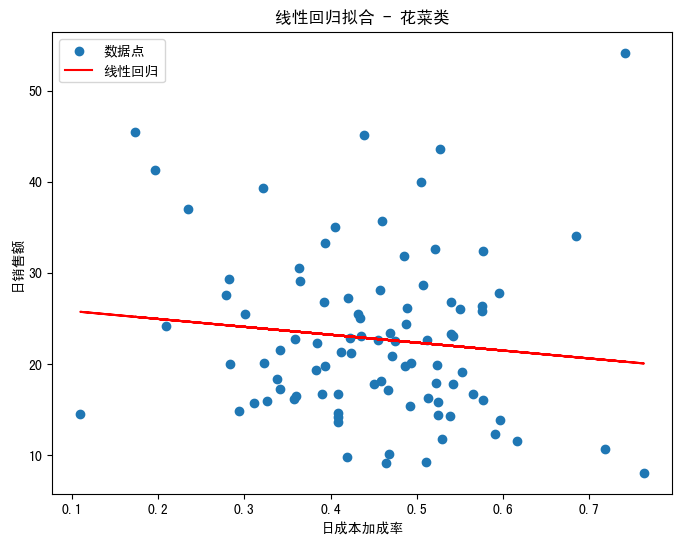

品类: 茄类
回归系数 (斜率): -2.505707975157917
截距: 24.88960796563226
R平方值 (拟合优度): 0.00


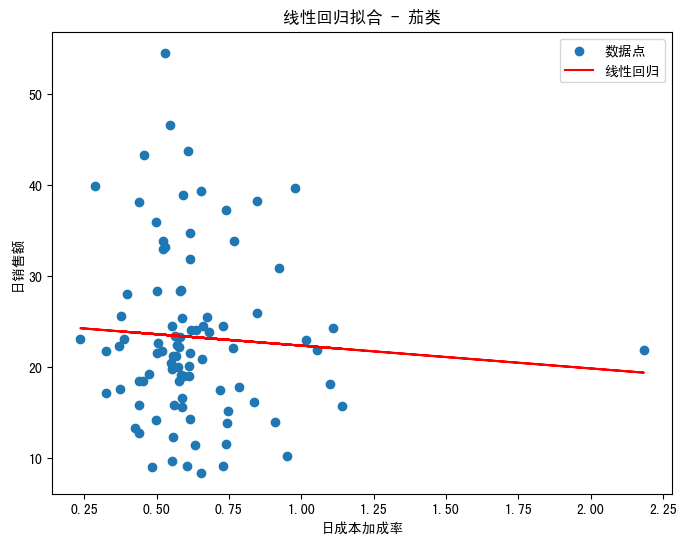

品类: 辣椒类
回归系数 (斜率): -42.694717125904305
截距: 129.36729131909874
R平方值 (拟合优度): 0.08


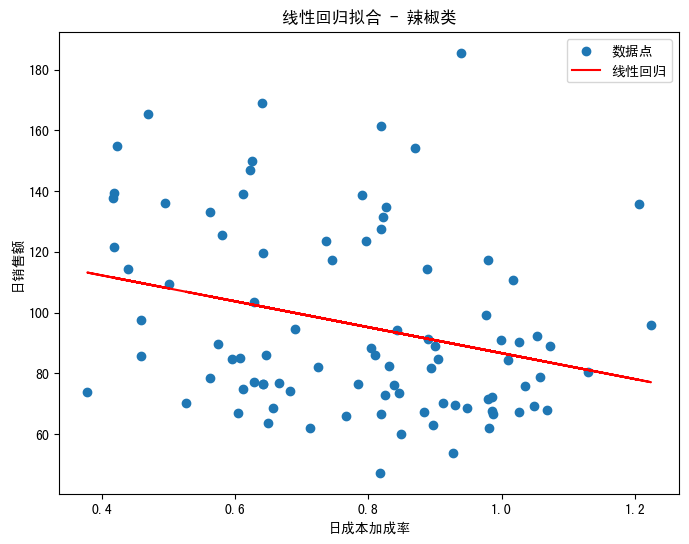

品类: 食用菌
回归系数 (斜率): 0.6982795155913512
截距: 69.16779511448873
R平方值 (拟合优度): 0.00


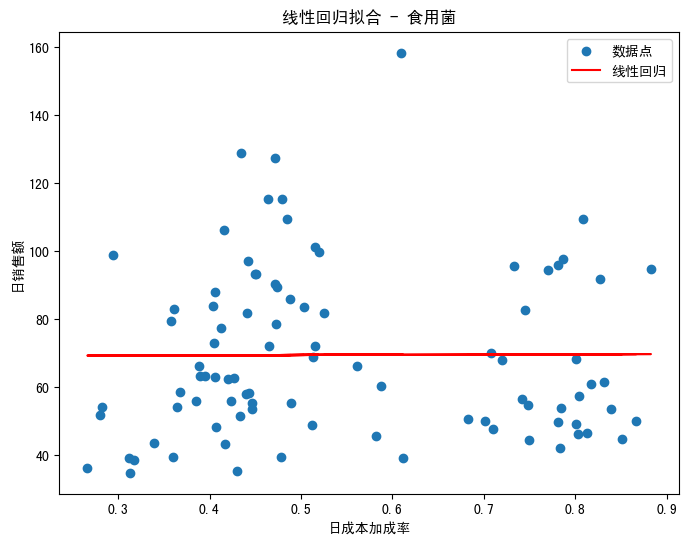

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 读取4-6品类日销售额数据
sales_data = pd.read_excel("4-6品类日销售额.xlsx")  # 替换成你的销售额数据文件路径

# 读取4-6品类成本加成率数据
cost_margin_data = pd.read_excel("4-6品类成本加成率.xlsx")  # 替换成你的成本加成率数据文件路径

# 获取品类列表
categories = ["水生根茎类", "花叶类", "花菜类", "茄类", "辣椒类", "食用菌"]

# 遍历每个品类，拟合线性回归模型
for category in categories:
    # 从销售额数据中获取对应品类的数据
    sales_category_data = sales_data[category]
    
    # 从成本加成率数据中获取对应品类的数据
    cost_margin_category_data = cost_margin_data[category]
    
    # 合并两个数据集
    merged_data = pd.concat([sales_category_data, cost_margin_category_data], axis=1)
    merged_data.columns = ["日销售额", "日成本加成率"]  # 重命名列
    
    # 提取销售量和成本加成率列作为特征和目标
    X = merged_data["日成本加成率"].values.reshape(-1, 1)  # 特征
    y = merged_data["日销售额"].values  # 目标
    
    # 创建线性回归模型
    model = LinearRegression()
    
    # 拟合模型
    model.fit(X, y)
    
    # 输出拟合结果
    print(f"品类: {category}")
    print("回归系数 (斜率):", model.coef_[0])
    print("截距:", model.intercept_)
    
    # 计算R平方值
    r_squared = model.score(X, y)
    print(f"R平方值 (拟合优度): {r_squared:.2f}")
    
    # 绘制散点图和回归线
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label="数据点")
    plt.plot(X, model.predict(X), color='red', label="线性回归")
    plt.title(f"线性回归拟合 - {category}")
    plt.xlabel("日成本加成率")
    plt.ylabel("日销售额")
    plt.legend()
    plt.show()


In [18]:
import pandas as pd

# 读取原始Excel文件
excel_file = "附件2-更新.xlsx"  # 替换成你的原始Excel文件路径
df = pd.read_excel(excel_file)

# 统计每个单品名称的数据量
item_counts = df['单品名称'].value_counts()

# 找出数据量少于100条的单品
items_to_delete = item_counts[item_counts < 100].index

# 删除数据量少于100条的单品数据
filtered_df = df[~df['单品名称'].isin(items_to_delete)]

# 保存处理后的数据到新的Excel文件
new_excel_file = "filtered_data.xlsx"  # 新文件路径和名称
filtered_df.to_excel(new_excel_file, index=False)


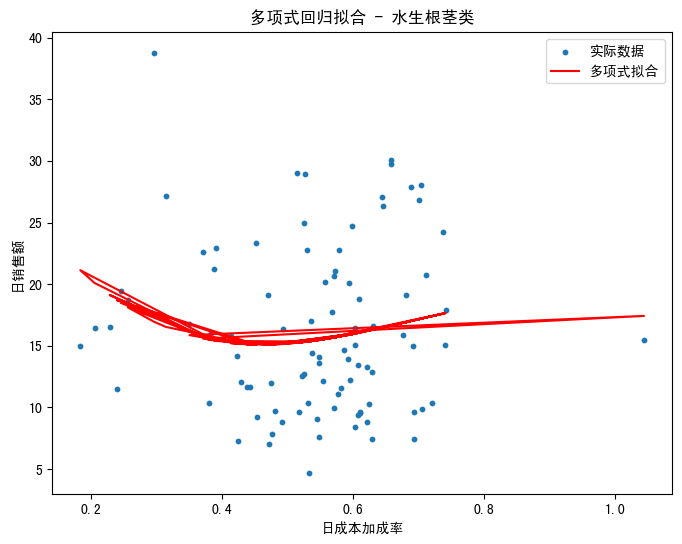

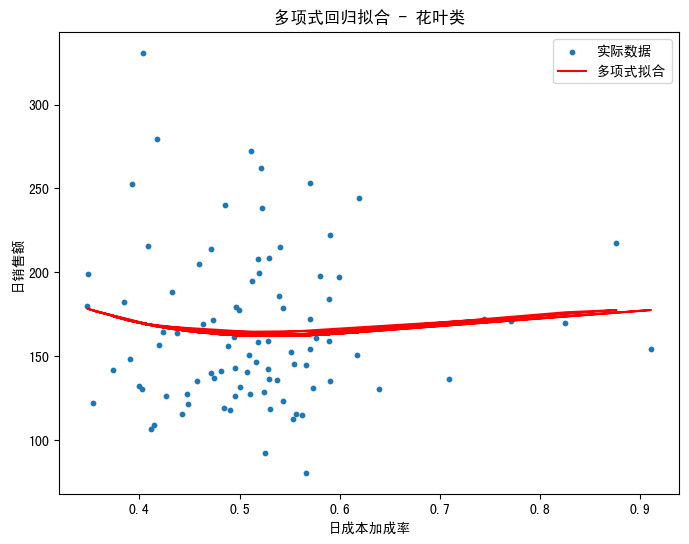

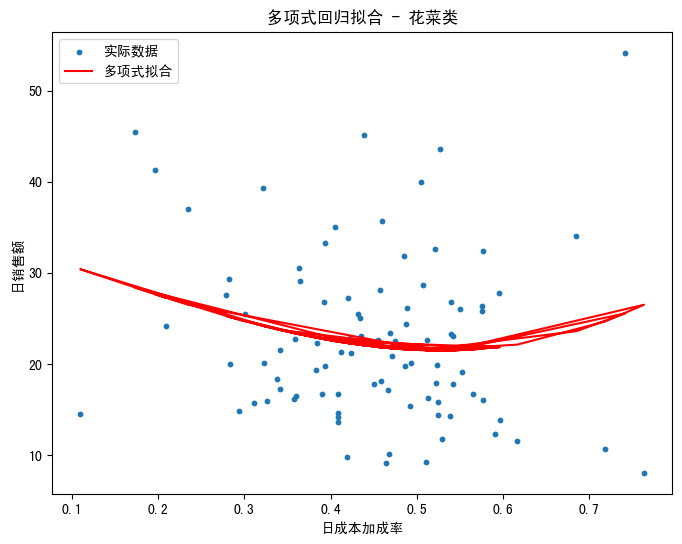

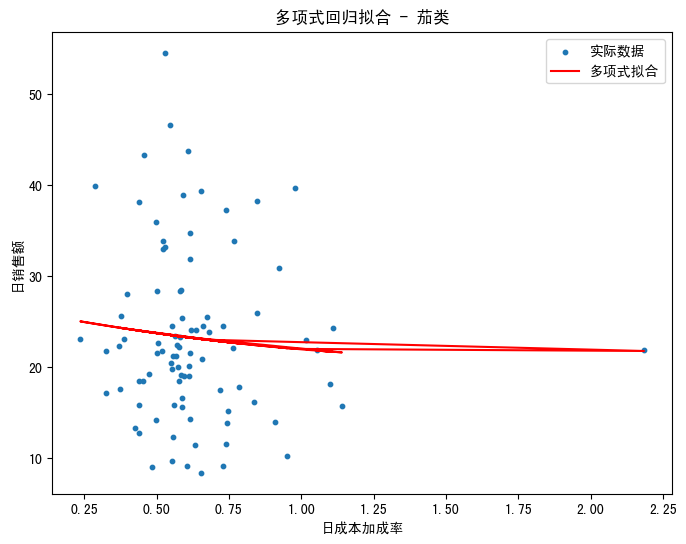

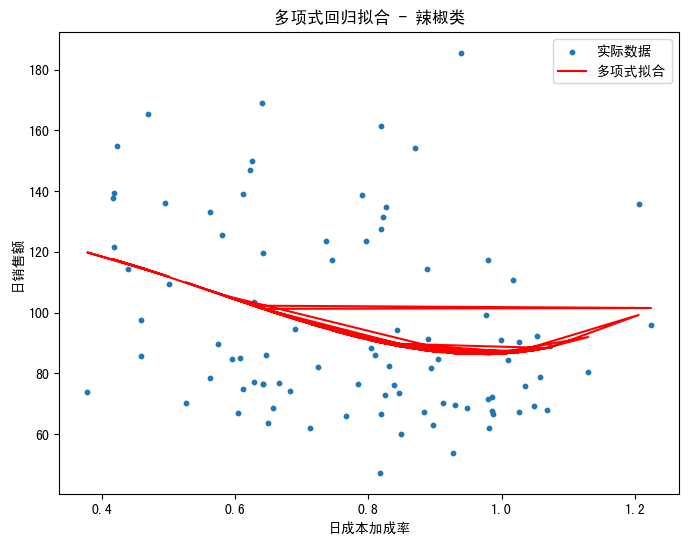

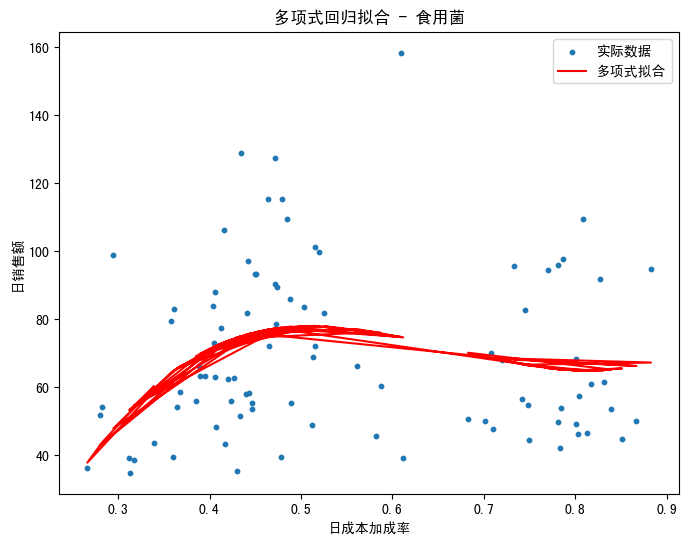

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 读取4-6品类日销售额数据
sales_data = pd.read_excel("4-6品类日销售额.xlsx")  # 替换成你的销售额数据文件路径

# 读取4-6品类成本加成率数据
cost_margin_data = pd.read_excel("4-6品类成本加成率.xlsx")  # 替换成你的成本加成率数据文件路径

# 获取品类列表
categories = ["水生根茎类", "花叶类", "花菜类", "茄类", "辣椒类", "食用菌"]

# 设置多项式的阶数
degree = 3  # 可根据需要调整多项式的阶数

# 遍历每个品类，进行多项式回归拟合
for category in categories:
    # 从销售额数据中获取对应品类的数据
    sales_category_data = sales_data[category]
    
    # 从成本加成率数据中获取对应品类的数据
    cost_margin_category_data = cost_margin_data[category]
    
    # 合并两个数据集
    merged_data = pd.concat([sales_category_data, cost_margin_category_data], axis=1)
    merged_data.columns = ["日销售额", "日成本加成率"]  # 重命名列
    
    # 提取特征和目标变量
    X = merged_data[["日成本加成率"]].values
    y = merged_data["日销售额"].values
    
    # 创建多项式特征
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    
    # 创建多项式回归模型
    model = LinearRegression()
    
    # 拟合模型
    model.fit(X_poly, y)
    
    # 预测销售额
    y_pred = model.predict(X_poly)
    
    # 绘制拟合曲线
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label="实际数据", s=10)
    plt.plot(X, y_pred, color='red', label="多项式拟合")
    plt.title(f"多项式回归拟合 - {category}")
    plt.xlabel("日成本加成率")
    plt.ylabel("日销售额")
    plt.legend()
    plt.show()


In [34]:
import pandas as pd

# 替换 'your_excel_file.xlsx' 为你的Excel文件路径和文件名
excel_file = pd.ExcelFile('三年分类数据.xlsx')

# 用来存储每个sheet的数据
all_data = []

# 遍历每个sheet
for sheet_name in excel_file.sheet_names:
    # 读取当前sheet
    df = excel_file.parse(sheet_name)
    
    # 将日期列转换为日期时间类型
    df['销售日期'] = pd.to_datetime(df['销售日期'])
    
    # 筛选出日期在2023年6月24日到30日之间的数据
    df_selected = df[(df['销售日期'] >= '2023-06-24') & (df['销售日期'] <= '2023-06-30')]
    
    # 添加到all_data列表中
    all_data.append(df_selected)

# 合并所有sheet的数据
final_data = pd.concat(all_data)

# 计算每个单品当日的总销售(千克)
daily_total_sales = final_data.groupby(['销售日期', '单品名称'])['销量(千克)'].sum().reset_index()

# 打印结果
print(daily_total_sales)

          销售日期        单品名称  销量(千克)
0   2023-06-24      七彩椒(2)   0.749
1   2023-06-24         上海青   5.127
2   2023-06-24    云南油麦菜(份)  24.000
3   2023-06-24     云南生菜(份)  49.000
4   2023-06-24       净藕(1)   5.757
..         ...         ...     ...
267 2023-06-30        野生粉藕   0.231
268 2023-06-30      金针菇(盒)  12.000
269 2023-06-30         长线茄   8.789
270 2023-06-30  青红杭椒组合装(份)   4.000
271 2023-06-30       高瓜(1)   0.464

[272 rows x 3 columns]


In [35]:
daily_total_sales.to_excel("624-630单品日销售量.xlsx", index='销售日期')

In [30]:
import pandas as pd

# 替换 'your_excel_file.xlsx' 为你的Excel文件路径和文件名
excel_file = pd.ExcelFile('三年分类数据.xlsx')

# 用来存储每个sheet的数据
all_data = []

# 遍历每个sheet
for sheet_name in excel_file.sheet_names:
    # 读取当前sheet
    df = excel_file.parse(sheet_name)
    
    # 将日期列转换为日期时间类型
    df['销售日期'] = pd.to_datetime(df['销售日期'])
    
    # 筛选出日期在2023年6月24日到30日之间的数据
    df_selected = df[(df['销售日期'] >= '2023-06-24') & (df['销售日期'] <= '2023-06-30')]
    
    # 按单品名称和日期分组并计算每个单品每天的总销量
    daily_total_sales = df_selected.groupby(['单品名称', '销售日期'])['销量(千克)'].sum()
    
    # 获取每个单品一天内的总销量
    daily_total_sales_by_product = daily_total_sales.groupby('单品名称').sum()
    
    # 筛选出一天内总销量不足2.5kg的单品
    selected_products = daily_total_sales_by_product[daily_total_sales_by_product < 2.5].index.tolist()
    
    # 根据筛选的单品名称重新过滤数据框
    df_filtered = df_selected[df_selected['单品名称'].isin(selected_products)]
    
    # 添加到all_data列表中
    all_data.append(df_filtered)

# 合并所有sheet的数据
final_data = pd.concat(all_data)

# 计算每个单品的总销量
total_sales_by_product = final_data.groupby('单品名称')['销量(千克)'].sum()

# 计算每个单品的加权利润率
final_data['加权利润率'] = final_data.apply(
    lambda row: row['销量(千克)'] / total_sales_by_product[row['单品名称']] * row['利润率'],
    axis=1
)

# 计算每个单品的总加权利润率
weighted_profit_by_product = final_data.groupby('单品名称')['加权利润率'].sum()

# 排序并获取前33位
top_33_products = weighted_profit_by_product.sort_values(ascending=False).head(33)

print(top_33_products)


单品名称
木耳菜(份)    1.549020
紫茄子(1)    1.073733
白玉菇(袋)    1.041766
野生粉藕      0.618334
青线椒(份)    0.516802
Name: 加权利润率, dtype: float64
